*Support Vector Machine (SVM)*: A Support Vector Classifier (SVC) with a sigmoid kernel was implemented to classify the input data into categories based on various health indicators. The data preprocessing phase involved normalizing the input features using a StandardScaler to address the scale differences among variables such as BMI, neck circumference, and STOP-BANG scores. The dataset was split into training and testing sets with a 70-30 ratio to evaluate model performance. Initially, the model showed moderate accuracy (57%) due to the presence of overlapping classes. Iterative feature selection and kernel tuning were conducted to improve classification performance (65%). The confusion matrix, paired with detailed metrics like precision, recall, and F1-score, was used to assess the model’s ability to distinguish between Mild, Moderate, and Severe cases. The input consisted of a variety of survey responses and other sociological factors, such as demographic information, medical history, and lifestyle habits, which provided valuable context for making accurate predictions.

In [58]:
import pandas as pd
from sklearn.svm import SVC   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the input data (features)
input_data = pd.read_excel('data_in.xlsx')  

# 2. Load the output data (labels)
output_labels = pd.read_excel('data_out.xlsx')   

# 3. Preprocessing: Handle missing values if necessary
input_data = input_data.dropna()  
output_labels = output_labels.dropna()  

# Make sure input_data and output_labels are aligned
assert len(input_data) == len(output_labels), "Data length mismatch!"

# 4. Split data into features (X) and target (y)
X = input_data
y = output_labels

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 6. Normalize the data using StandardScaler (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train the SVM model
svm_model = SVC(kernel='sigmoid', C=1.0) 
svm_model.fit(X_train, y_train)

# 8. Make predictions
y_pred = svm_model.predict(X_test)

# 9. Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.6571428571428571
Classification Report:
              precision    recall  f1-score   support

           2       0.67      0.50      0.57        12
           4       0.88      0.48      0.62        29
           6       0.58      0.90      0.70        29

    accuracy                           0.66        70
   macro avg       0.71      0.63      0.63        70
weighted avg       0.72      0.66      0.65        70



C:\Users\Roni\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


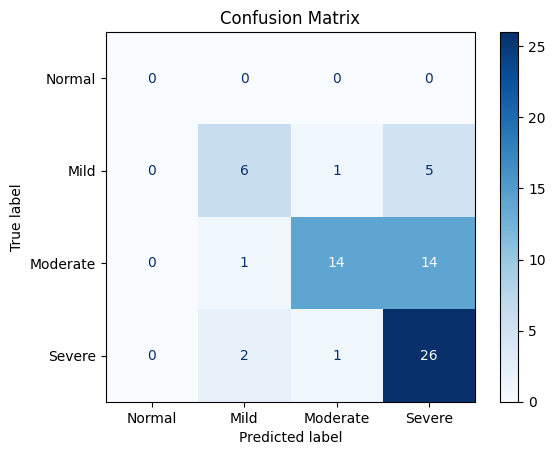

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure y_test and y_pred are 1D arrays or Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]  # Extract the first column if y_test is a DataFrame
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.iloc[:, 0]  # Extract the first column if y_pred is a DataFrame

# Convert to numpy array if necessary
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Map numeric labels to their corresponding class names
label_map = {0: 'Normal', 2: 'Mild', 4: 'Moderate', 6: 'Severe'}
y_test_mapped = pd.Series(y_test).map(label_map)  # Convert numeric labels to strings
y_pred_mapped = pd.Series(y_pred).map(label_map)  # Convert predictions to strings

# Check if mapping worked correctly
if y_test_mapped.isnull().any() or y_pred_mapped.isnull().any():
    raise ValueError("Mapping failed: Ensure y_test and y_pred contain only keys in label_map.")

# Compute the confusion matrix with mapped labels
class_names = ['Normal', 'Mild', 'Moderate', 'Severe']
cm = confusion_matrix(y_test_mapped, y_pred_mapped, labels=class_names)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
